In [1]:
%load_ext autoreload
%autoreload 2

# Visualize

In [2]:
import os
os.chdir('/home/stud/ath/ath_ws/keypoint_dataset_pipeline')
from config import config
import cv2
import numpy as np

In [4]:
from src import Painter
painter = Painter()

In [5]:
names = painter.data_store.get_random_pair()
name_a, name_b = names.split('_')

# name_a, name_b = '8971837365490', '8972170258890'
name_a, name_b

('8934752998090', '8934952739890')

In [5]:
# name_a = config.samples[config.task.name].reference
# name_b = config.samples[config.task.name].target
# 
# name_a, name_b

# Keypoints

In [6]:
# painter.show_keypoints(name_a, filtered=False)

In [7]:
# painter.show_keypoints(name_a, filtered=True)

# Matches

In [8]:
# painter.show_matches(name_a, name_b) 

# Filtered Matches

INFO     | show_filtered_matches | Number of Matches 76


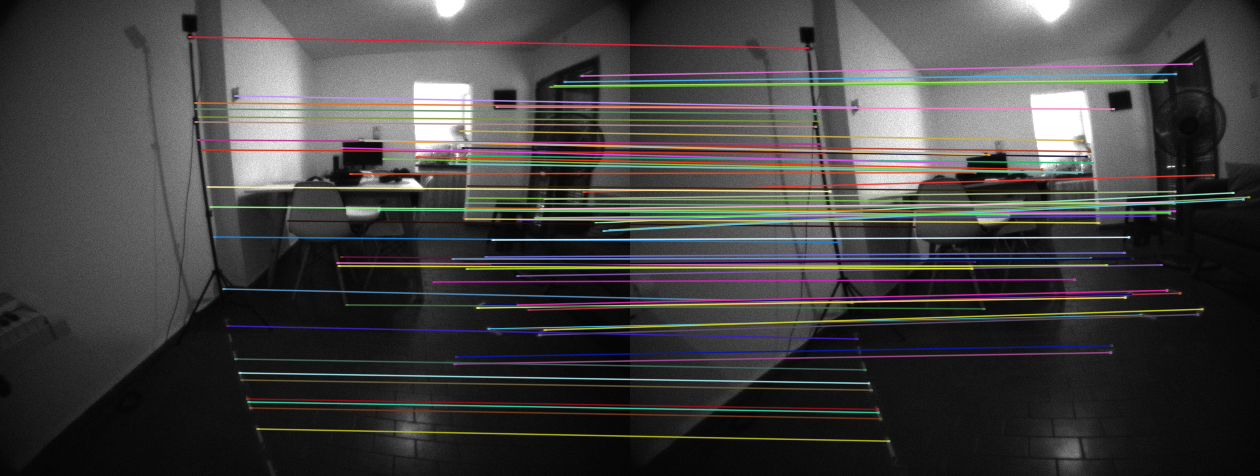

In [6]:
painter.show_filtered_matches(name_a, name_b)

original_w, original_h (640, 480)
crop_w, crop_h (630, 476)
left_padding, top_padding (5.0, 2.0)
INFO     | show_matches_on_original_image | Number of Matches 76


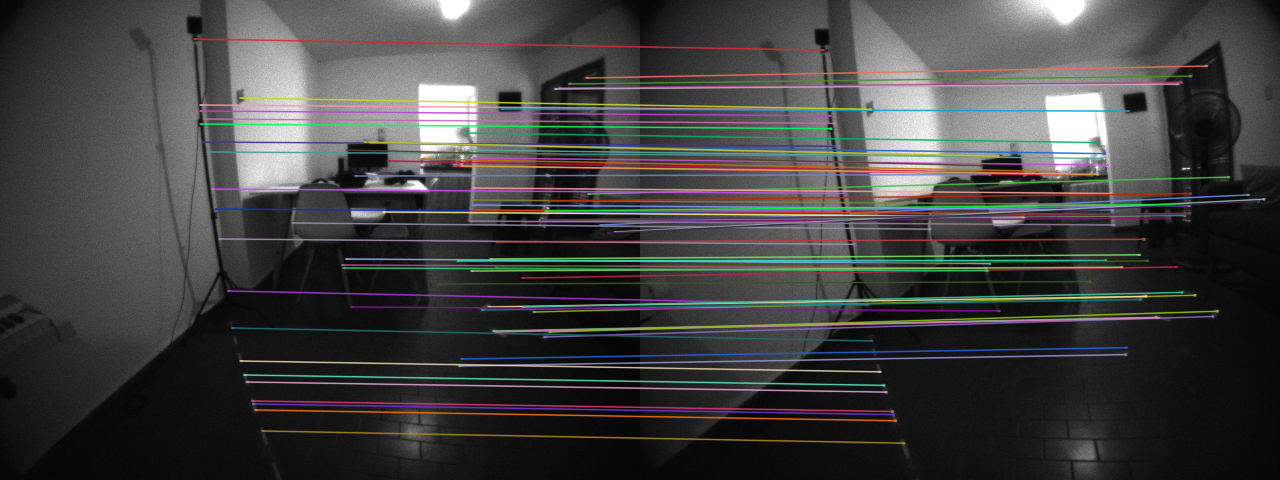

In [7]:
painter.show_matches_on_original_image(name_a, name_b)

# Rotations

In [8]:
from src import rotate

INFO     | show_one_match | Number of Matches 76


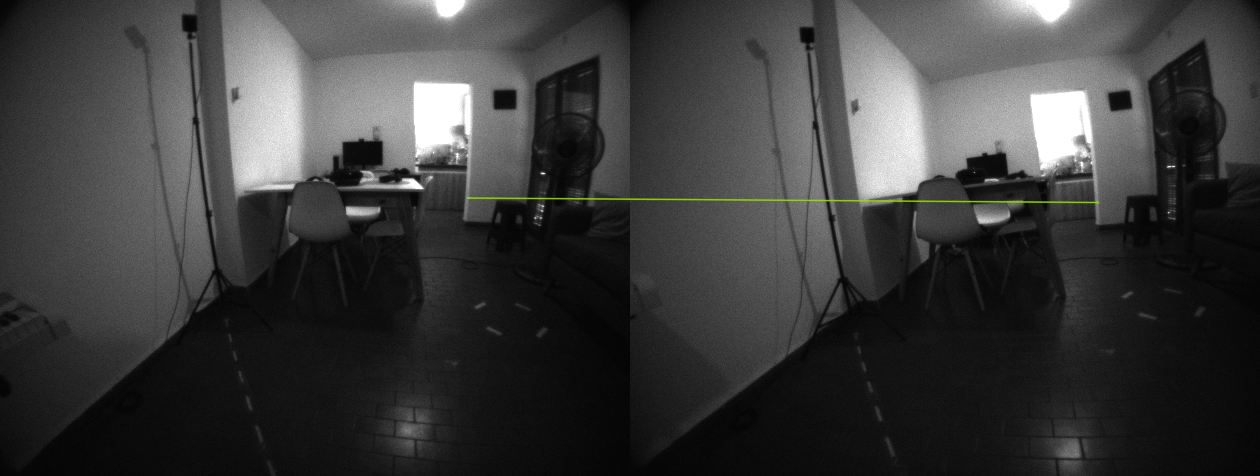

In [43]:
index = 25

image_vis, image_a, image_b, image_a_coord, image_b_coord = painter.show_one_match(name_a, name_b, index=index)
image_vis

In [44]:
# im = cv2.drawKeypoints(np.array(image_a), [image_a_coord], None)
# painter._to_image(im)

In [45]:
# im = cv2.drawKeypoints(np.array(image_b), [image_b_coord], None)
# painter._to_image(im)

In [46]:
def crop_patch(image, x, y, size=64):
    # Calculate the box (left, upper, right, lower) for cropping
    left = max(x - size / 2, 0)
    upper = max(y - size / 2, 0)
    right = min(x + size / 2, image.width)
    lower = min(y + size / 2, image.height)
    
    # Crop and return the patch
    patch = image.crop((left, upper, right, lower))
    
    local_x = x - left
    local_y = y - upper
    
    return patch, local_x, local_y

bw_image_a, a_x, a_y = crop_patch(image_a, image_a_coord.pt[0], image_a_coord.pt[1])
bw_image_a = bw_image_a.convert("L")

bw_image_b, b_x, b_y = crop_patch(image_b, image_b_coord.pt[0], image_b_coord.pt[1])
bw_image_b = bw_image_b.convert("L")

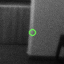

In [47]:
painter._to_image(
    cv2.drawKeypoints(
        np.array(bw_image_a), 
        [cv2.KeyPoint(a_x, a_y, 1.)], 
        None
    )
)

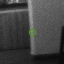

In [48]:
painter._to_image(
    cv2.drawKeypoints(
        np.array(bw_image_b), 
        [cv2.KeyPoint(b_x, b_y, 1.)], 
        None
    )
)

In [49]:
print(image_a_coord.pt, image_b_coord.pt)
print([a_x, a_y], [b_x, b_y])

(467.5, 197.5) (467.3533935546875, 202.01791381835938)
[32.0, 32.0] [32.0, 32.0]


In [50]:
image_path_a: str = f"{config.paths[config.task.name].images}/{name_a}.png"
image_path_b: str = f"{config.paths[config.task.name].images}/{name_b}.png"

angle = rotate.solve_patch_rotation(
    image_path_a, 
    image_path_b, 
    [image_a_coord.pt[0] + 5, image_a_coord.pt[1] + 2],
    [image_b_coord.pt[0] + 5, image_b_coord.pt[1] + 2],
)

print(angle)
print(np.degrees(angle))

-0.1487662259360074
-8.523676880222869


In [51]:
stored_angles = painter.data_store.rotations[names][()]
print(stored_angles.shape)
print(stored_angles[index])
print(np.degrees(stored_angles[index]))

(76,)
-0.1487662259360074
-8.523676880222869


In [52]:
# painter.data_store.close()

In [53]:
# import h5py
# file_normal = h5py.File("/home/stud/ath/ath_ws/keypoint_dataset_pipeline/output/output_normal/train/train_data2.hdf5", mode='r')

In [54]:
# import torch
# f = file_normal

# references_group = f[f'{config.task.track}/{config.task.cam}/reference_coords']
# targets_group = f[f'{config.task.track}/{config.task.cam}/target_coords']

# indices_group = f[f'{config.task.track}/{config.task.cam}/indices']
# indices = indices_group[names][()].astype(np.int32)
# N = min(len(indices), 120)
# assert N != 0
# indices = indices[:N]

# reference_coords = references_group[names][()][indices].astype(np.float32)
# target_coords = targets_group[names][()][indices].astype(np.float32)
# assert reference_coords.shape == target_coords.shape

# reference_coords = [(x, y) for x, y in reference_coords]
# target_coords = [(x, y) for x, y in target_coords]

# rotations_group = f[f'{config.task.track}/{config.task.cam}/rotations']
# rotations = rotations_group[names][()][indices].astype(np.float32)
# rotations = torch.tensor(rotations, dtype=torch.float32)

In [55]:
# print(rotations[index])
# print(np.degrees(rotations[index]))